In [42]:
import numpy as np
import matplotlib.pyplot as plt

##Add noice to the signal 
#s = 0.15
s = 0.05

noise = np.random.normal(0,s,1505).tolist()


print(noise)

[0.03436936995857954, -0.027139997661032162, -0.05339543342005731, -0.011882833890620934, 0.021285599505945586, 0.03319810936210749, 0.10387396344569942, 0.0009983047068773873, -0.031204393796337288, -0.014186708249503752, -0.04041245927433172, 0.05086980070060685, 0.02826582376399165, -0.05028070331932893, -0.07297685651119322, -0.02472676563816952, 0.05438324985585783, -0.013506151749973487, 0.052290866929192076, -0.027875718586179488, -0.024292059286793316, -0.09213768601716078, -7.816476173175324e-05, 0.02689519560391008, 0.0691768282113087, -0.01940803217147323, -0.03761413382937136, -0.047645468796063205, -0.08338344333316577, 0.015381151611815134, 0.055406998889904725, 0.03282118976572395, 0.04758582385504676, -0.012881196955922426, -0.047589158062743504, 0.049628412475816126, -0.03864542002204939, -0.0608948603300559, 0.016952446027782505, 0.06010821779827487, 0.06786654745035713, 0.004010311040910799, -0.04411429648098156, 0.01094702233967123, 0.07682922540394425, -0.026388299

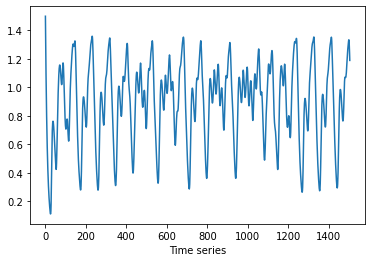

1505
1505


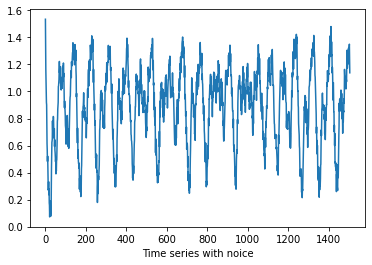

1200
1200


In [43]:
import numpy as np
import matplotlib.pyplot as plt


def mc_time(n=10,b=0.2,g=0.1,tao=25,x0 = 1.5, N = 1505): #Number, beta, gamma, tau
    #generate a mackey-glass time series from x(0) = 1.5
    x = [x0]
    for t in range(1, N):
        if t < tao:
            value = x[t-1] - g*x[t-1]
            x.append(value)
        else:
            value = x[t-1] + (b*x[t-tao])/(1+x[t-tao]**10) - g*x[t-1]
            x.append(value)
    return x 

#Creating time series
x = mc_time()

plt.plot(x)
plt.xlabel('Time series')
plt.show()

print(len(x))

x = [sum(i) for i in zip(x, noise) ]

print(len(x))

plt.plot(x)
plt.xlabel('Time series with noice')
plt.show()

input_data = []
output_data = []

for t in range(300, 1500):
    input_data.append([x[t-20], x[t-15], x[t-10], x[t-5], x[t]])
    output_data.append([x[t+5]])
    
print(len(input_data))
print(len(output_data))

#check these parameters, 700,300,200 ok?
#generate data for NN
traning_input =input_data[0:700]
traning_result = output_data[0:700]

validate_input = input_data[700:1000]
validate_result = output_data[700:1000]

test_input = input_data[1000:1200]
test_result = output_data[1000:1200]

traning_input = np.array(traning_input).astype(float)
traning_result = np.array(traning_result).astype(float)
validate_input = np.array(validate_input).astype(float)
validate_result = np.array(validate_result).astype(float)
test_input = np.array(test_input).astype(float)
test_result = np.array(test_result).astype(float)

In [19]:
print(traning_input[243])

print(traning_result[243])


[1.26833782 1.32760871 1.16338836 0.90182401 0.73080257]
[0.5385016]


In [64]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import layers
from keras.regularizers import l2

import numpy as np

#Fix backprop, acctivation func? 
#Fix early stopping

nh_1 = [5]#[3,4,5]

nh_2 = [3,6,9]

def create_feedforward_network(layers,  drop_frac = 0.1, acct = 'sigmoid', lamda = 0):

    model = Sequential()

    for i in range(1, len(layers)):
        print(layers[i])
        if i == 1:
            model.add(Dense(layers[i], input_dim = layers[0]))
        elif i == len(layers) - 1:
            model.add(Dense(layers[i], kernel_regularizer=l2(lamda), bias_regularizer=l2(lamda)))
        else:
            model.add(Dense(layers[i]))
           #model.add(Dropout(drop_frac)) #Dropout counts as a regulizer technique. 
            
    return model

input_layer = [5]
output_layer = [1] 

bs = 10
ep = 40

predictions = []
history = []

lamdas = [0,0.1, 0.05,0.01,0.005,0.001]

early = 50

layers_tested = []
lamdas_tested = []
for lamda in lamdas: 
  for h1 in range(len(nh_1)):
    for h2 in range(len(nh_2)):

      hidden_layers = [nh_1[h1],nh_2[h2]]
      layers_tested.append(hidden_layers)
      lamdas_tested.append(lamda)

      print(input_layer + hidden_layers + output_layer)

      model = create_feedforward_network(input_layer + hidden_layers + output_layer, lamda)

      es = EarlyStopping(monitor='val_loss', patience = early)

      model.summary()

      model.compile(optimizer='sgd', loss = 'mean_squared_error', metrics = ['mse'])

      history.append(model.fit(traning_input, traning_result, epochs = ep, batch_size = bs, validation_data = (validate_input,validate_result), callbacks = [es]))

      predictions.append(model.predict(test_input))


[5, 5, 3, 1]
5
3
1
Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_359 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_360 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_361 (Dense)            (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
70/70 [==============================] - 1s 4ms/step - loss: 0.1039 - mse: 0.1039 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 2/40
70/70 [==============================] - 0s 2ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 3/40
70/70 [==============================] - 0s 2ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.

[3, 2] avg = [0.01454478] std =  0.11075680225564982
Val_loss 0.010124459862709045 mse 0.009965461678802967


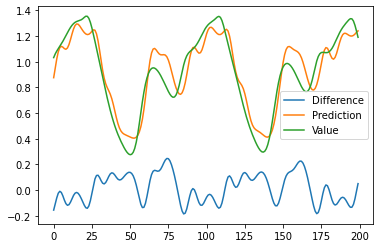

[3, 4] avg = [-0.07192933] std =  0.10262131383565348
Val_loss 0.010680974461138248 mse 0.009854871779680252


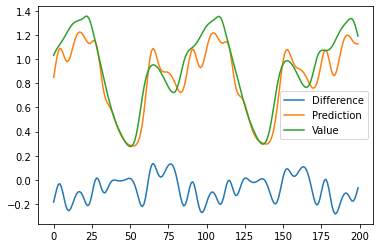

[3, 6] avg = [0.01751414] std =  0.13095139882998796
Val_loss 0.014923513866961002 mse 0.013774314895272255


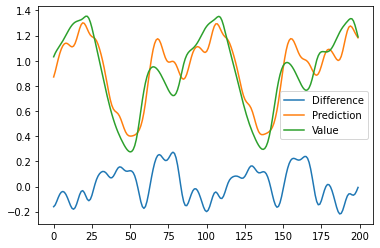

[4, 2] avg = [0.02699072] std =  0.12746605835618544
Val_loss 0.0146989980712533 mse 0.014212178066372871


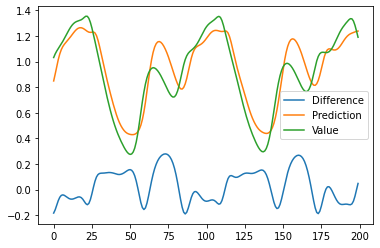

[4, 4] avg = [0.02417016] std =  0.13982878552710554
Val_loss 0.016768449917435646 mse 0.015885837376117706


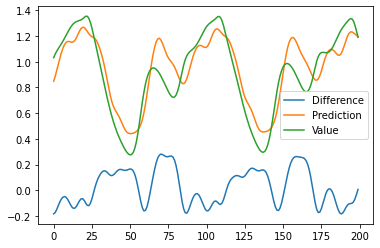

[4, 6] avg = [-0.02252456] std =  0.15269758960862473
Val_loss 0.021103736013174057 mse 0.02058151178061962


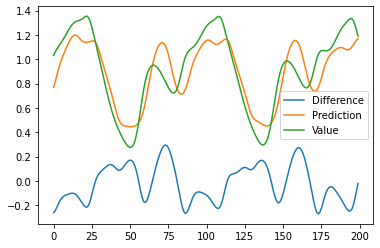

[5, 2] avg = [0.01858991] std =  0.11613702370621737
Val_loss 0.01022351160645485 mse 0.010107288137078285


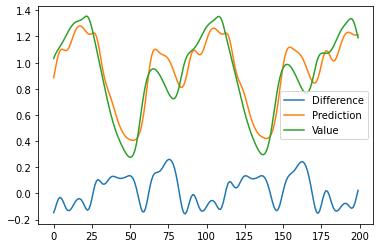

[5, 4] avg = [0.01355021] std =  0.13214333470138204
Val_loss 0.013269319199025631 mse 0.013269283808767796


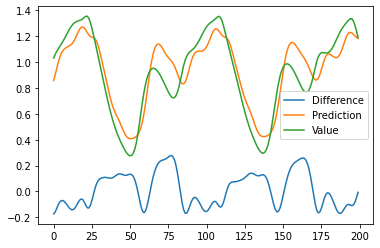

[5, 6] avg = [-0.00015132] std =  0.13066119735982326
Val_loss 0.012409478425979614 mse 0.012723271735012531


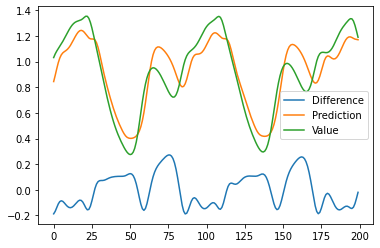

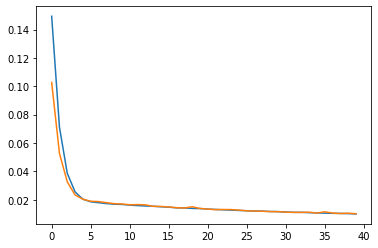

{'loss': [0.14937028288841248, 0.07104576379060745, 0.03858252987265587, 0.025489145889878273, 0.020336290821433067, 0.0185223575681448, 0.017880313098430634, 0.017280984669923782, 0.016811545938253403, 0.016668172553181648, 0.016152923926711082, 0.015850039198994637, 0.015545613132417202, 0.015384748578071594, 0.014979719184339046, 0.014724004082381725, 0.01423860713839531, 0.01417967677116394, 0.01385379396378994, 0.013745223172008991, 0.013364785350859165, 0.013113319873809814, 0.012863132171332836, 0.012614218518137932, 0.012421239167451859, 0.012207075022161007, 0.011998157948255539, 0.01194488350301981, 0.011669332161545753, 0.011601652018725872, 0.01130566094070673, 0.011059527285397053, 0.011102396063506603, 0.01084480993449688, 0.010687261819839478, 0.010525008663535118, 0.010381737723946571, 0.010331309400498867, 0.010173579677939415, 0.009965461678802967], 'mse': [0.14937028288841248, 0.07104576379060745, 0.03858252987265587, 0.025489145889878273, 0.020336290821433067, 0.018

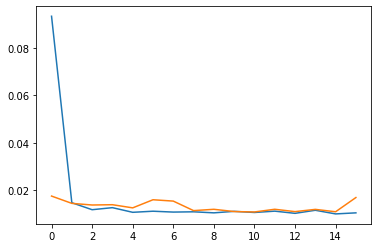

{'loss': [0.09355659782886505, 0.014590336941182613, 0.011637370102107525, 0.012504291720688343, 0.010534366592764854, 0.01099945604801178, 0.010631176643073559, 0.010749653913080692, 0.010309337638318539, 0.010941085405647755, 0.010462605394423008, 0.011025890707969666, 0.01010120939463377, 0.011400166898965836, 0.009854871779680252, 0.01030516717582941], 'mse': [0.09355659782886505, 0.014590336941182613, 0.011637370102107525, 0.012504291720688343, 0.010534366592764854, 0.01099945604801178, 0.010631176643073559, 0.010749653913080692, 0.010309337638318539, 0.010941085405647755, 0.010462605394423008, 0.011025890707969666, 0.01010120939463377, 0.011400166898965836, 0.009854871779680252, 0.01030516717582941], 'val_loss': [0.017411118373274803, 0.014319815672934055, 0.013627764768898487, 0.013754505664110184, 0.012417847290635109, 0.01585295982658863, 0.015285435132682323, 0.011251191608607769, 0.011809447780251503, 0.010858495719730854, 0.010680974461138248, 0.011822838336229324, 0.010827

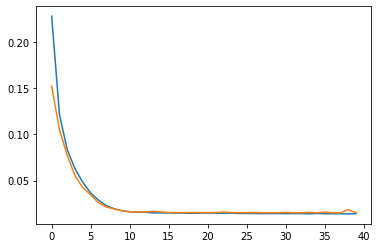

{'loss': [0.22835464775562286, 0.12155615538358688, 0.08337163180112839, 0.0626024603843689, 0.04789255931973457, 0.0365128368139267, 0.02865500934422016, 0.02281184308230877, 0.01938422955572605, 0.01728454791009426, 0.01608719490468502, 0.015724189579486847, 0.015504204668104649, 0.014921500347554684, 0.014881973154842854, 0.014848561957478523, 0.014688916504383087, 0.014688167721033096, 0.014392678625881672, 0.014643150381743908, 0.01472497545182705, 0.014536198228597641, 0.0144868278875947, 0.014623686671257019, 0.014254258014261723, 0.0142869483679533, 0.014234592206776142, 0.01409493200480938, 0.014114954508841038, 0.014131930656731129, 0.01410591695457697, 0.01416800543665886, 0.014042213559150696, 0.013963298872113228, 0.014184392988681793, 0.014025711454451084, 0.013903585262596607, 0.013984888792037964, 0.013774314895272255, 0.014057192020118237], 'mse': [0.22835466265678406, 0.12155615538358688, 0.08337163180112839, 0.0626024603843689, 0.04789255931973457, 0.0365128368139267

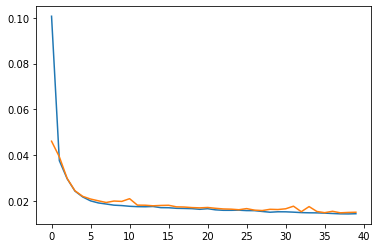

{'loss': [0.1007404774427414, 0.03752166032791138, 0.02962973155081272, 0.024212656542658806, 0.021623961627483368, 0.019925633445382118, 0.019022131338715553, 0.018542686477303505, 0.018041212111711502, 0.017862819135189056, 0.017553595826029778, 0.01739017851650715, 0.017344193533062935, 0.017460107803344727, 0.01695660687983036, 0.016918286681175232, 0.016670450568199158, 0.016599956899881363, 0.016512485221028328, 0.016229651868343353, 0.01649719849228859, 0.015997912734746933, 0.015795448794960976, 0.015789741650223732, 0.015843510627746582, 0.015663444995880127, 0.015641871839761734, 0.01528153009712696, 0.014952006749808788, 0.015147688798606396, 0.015130569227039814, 0.014982614666223526, 0.014786608517169952, 0.01470096968114376, 0.014671128243207932, 0.014557426795363426, 0.01439450029283762, 0.014247805811464787, 0.014212178066372871, 0.014294200576841831], 'mse': [0.1007404774427414, 0.03752166032791138, 0.02962973155081272, 0.024212656542658806, 0.021623961627483368, 0.019

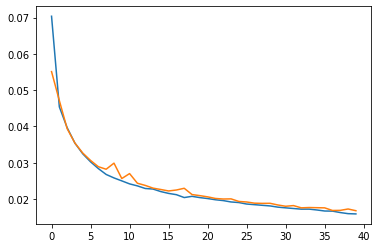

{'loss': [0.07035215944051743, 0.04536675289273262, 0.03964963182806969, 0.03536902368068695, 0.03244931623339653, 0.030239595100283623, 0.02837027609348297, 0.02675653249025345, 0.025802701711654663, 0.024991245940327644, 0.024161292240023613, 0.02361072599887848, 0.02289537340402603, 0.022737620398402214, 0.022040948271751404, 0.021538332104682922, 0.02118610590696335, 0.020394084975123405, 0.020730890333652496, 0.020382778719067574, 0.02011948637664318, 0.019789716228842735, 0.01955706998705864, 0.01918039098381996, 0.01901804283261299, 0.0186070054769516, 0.018434278666973114, 0.018258990719914436, 0.01808914914727211, 0.01775185950100422, 0.01756053976714611, 0.017376787960529327, 0.017198245972394943, 0.017207732424139977, 0.016971779987215996, 0.016686441376805305, 0.016652647405862808, 0.01626003161072731, 0.015956956893205643, 0.015885837376117706], 'mse': [0.07035215944051743, 0.04536675289273262, 0.03964963182806969, 0.03536902368068695, 0.03244931623339653, 0.03023959510028

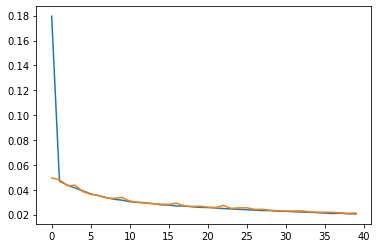

{'loss': [0.17950373888015747, 0.04688035324215889, 0.04374425858259201, 0.04143788665533066, 0.03910445794463158, 0.03673222288489342, 0.03526882082223892, 0.03374355286359787, 0.032372452318668365, 0.03165428712964058, 0.03042309172451496, 0.02982853539288044, 0.02938138134777546, 0.028841201215982437, 0.027909286320209503, 0.027684487402439117, 0.02696819044649601, 0.02691422402858734, 0.026334485039114952, 0.025858115404844284, 0.025704361498355865, 0.0253339521586895, 0.024901635944843292, 0.024619320407509804, 0.02424062229692936, 0.023959830403327942, 0.023598166182637215, 0.02326463907957077, 0.023262372240424156, 0.022765783593058586, 0.022720342501997948, 0.022326841950416565, 0.022094013169407845, 0.021947652101516724, 0.021610202267766, 0.021271521225571632, 0.020962104201316833, 0.02114071696996689, 0.020622938871383667, 0.02058151178061962], 'mse': [0.17950373888015747, 0.04688035324215889, 0.04374426603317261, 0.04143788293004036, 0.03910445794463158, 0.03673222288489342

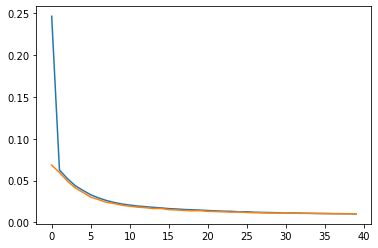

{'loss': [0.24669213593006134, 0.06258878856897354, 0.05253692716360092, 0.04404164105653763, 0.03832903131842613, 0.03303699567914009, 0.02926424890756607, 0.026194194331765175, 0.023870622739195824, 0.021986208856105804, 0.020727921277284622, 0.019549734890460968, 0.01878337375819683, 0.018001103773713112, 0.017332416027784348, 0.01645023003220558, 0.016019899398088455, 0.015428213402628899, 0.01504596322774887, 0.014692286029458046, 0.014172653667628765, 0.013761254958808422, 0.013377830386161804, 0.013202234171330929, 0.012671815231442451, 0.012665288522839546, 0.012112519703805447, 0.011894225142896175, 0.011717894114553928, 0.011540487408638, 0.011360136792063713, 0.011197665706276894, 0.011044071987271309, 0.010806431993842125, 0.010678200051188469, 0.010571420192718506, 0.010455390438437462, 0.010414096526801586, 0.010295160114765167, 0.010107288137078285], 'mse': [0.24669213593006134, 0.06258878856897354, 0.05253692716360092, 0.04404164105653763, 0.03832903131842613, 0.0330369

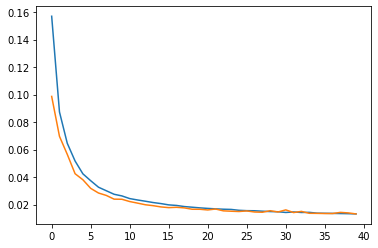

{'loss': [0.15696461498737335, 0.08739559352397919, 0.06460223346948624, 0.051730863749980927, 0.042404964566230774, 0.03740907832980156, 0.03267819806933403, 0.03011036105453968, 0.027548661455512047, 0.026355208829045296, 0.02441834658384323, 0.02340416982769966, 0.022499339655041695, 0.021541278809309006, 0.020779404789209366, 0.019835220649838448, 0.019426099956035614, 0.01861424185335636, 0.018142474815249443, 0.017658764496445656, 0.017270289361476898, 0.01695195399224758, 0.01668594405055046, 0.01653047651052475, 0.01589757762849331, 0.015639452263712883, 0.01556442491710186, 0.015242073684930801, 0.014982757158577442, 0.014845255762338638, 0.014325877651572227, 0.014688418246805668, 0.014317726716399193, 0.014407599344849586, 0.013823632150888443, 0.01372540183365345, 0.01364181935787201, 0.0135378772392869, 0.013446140103042126, 0.013269283808767796], 'mse': [0.15696461498737335, 0.08739559352397919, 0.06460223346948624, 0.051730863749980927, 0.042404964566230774, 0.0374090783

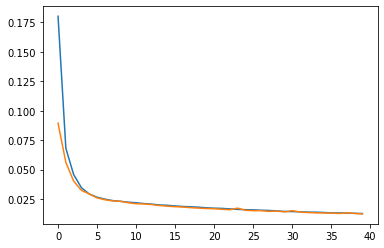

{'loss': [0.18015532195568085, 0.06810984015464783, 0.04578416049480438, 0.0345773920416832, 0.029300620779395103, 0.026574501767754555, 0.024950060993433, 0.023714017122983932, 0.023092877119779587, 0.022362034767866135, 0.02188211679458618, 0.02119276113808155, 0.020711977034807205, 0.019995277747511864, 0.019714727997779846, 0.019154340028762817, 0.01871207170188427, 0.01845749095082283, 0.01811654306948185, 0.017609454691410065, 0.01729224994778633, 0.017089243978261948, 0.016646601259708405, 0.01627058908343315, 0.015994438901543617, 0.01587124913930893, 0.015542645007371902, 0.015346173197031021, 0.014986376278102398, 0.014544963836669922, 0.014382309280335903, 0.014219984412193298, 0.013951955363154411, 0.013890224508941174, 0.013636062853038311, 0.013284757733345032, 0.013238330371677876, 0.013165050186216831, 0.012911519035696983, 0.012723271735012531], 'mse': [0.18015532195568085, 0.06810984015464783, 0.04578416049480438, 0.0345773920416832, 0.029300620779395103, 0.0265745017

<Figure size 432x288 with 0 Axes>

In [41]:
#print(prediction)

show = True

result = []
for n, pred in enumerate(predictions): 
  result = []
  for i in range(len(test_input)):
    result.append((pred[i] - test_result[i]))
    #print(pred[i] - test_result[i])

  print(layers_tested[n],"avg =", (sum(result)/len(result)),"std = ",np.std(result))
  print("Val_loss",min(history[n].history['val_loss']),"mse",min(history[n].history['mse']) )
  if show: 
    plt.plot(result, label = 'Difference')
    plt.plot(pred, label = 'Prediction')
    plt.plot(test_result, label = 'Value')
    plt.legend(loc='best')
    plt.show()
    plt.clf()

for run in history: 

  plt.plot(run.history['loss'], label='train')
  plt.plot(run.history['val_loss'], label='val')
  plt.show()
  plt.clf()
  print(run.history)




[5, 3] lamda = 0 avg = [0.01729297] std =  0.14865961233196592
Val_loss 0.01914331316947937 mse 0.01776033267378807
[5, 6] lamda = 0 avg = [0.05727127] std =  0.1498369325981981
Val_loss 0.018291927874088287 mse 0.016872698441147804
[5, 9] lamda = 0 avg = [0.03648719] std =  0.1506352301922487
Val_loss 0.01816425658762455 mse 0.017290467396378517
[5, 3] lamda = 0.1 avg = [-0.00529488] std =  0.15054902911313012
Val_loss 0.01995309256017208 mse 0.01847190223634243
[5, 6] lamda = 0.1 avg = [-0.00720866] std =  0.1522707942659031
Val_loss 0.01815100386738777 mse 0.017428308725357056
[5, 9] lamda = 0.1 avg = [0.02365602] std =  0.15871901255657803
Val_loss 0.019120510667562485 mse 0.01785035990178585
[5, 3] lamda = 0.05 avg = [-0.00566357] std =  0.16008256048777836
Val_loss 0.020801037549972534 mse 0.019306663423776627
[5, 6] lamda = 0.05 avg = [0.00612657] std =  0.15154971514631108
Val_loss 0.018386565148830414 mse 0.017065053805708885
[5, 9] lamda = 0.05 avg = [0.01934605] std =  0.166

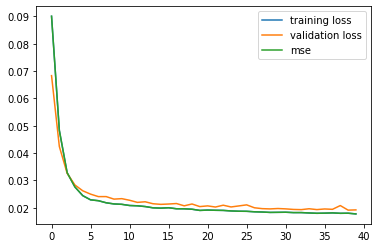

{'loss': [0.09004734456539154, 0.04828779026865959, 0.032829828560352325, 0.027592569589614868, 0.02444140613079071, 0.022906266152858734, 0.02259315922856331, 0.021832603961229324, 0.021409647539258003, 0.021267637610435486, 0.02083699032664299, 0.02072833478450775, 0.020455246791243553, 0.01999112032353878, 0.01987362839281559, 0.02002054639160633, 0.01964760385453701, 0.01963307149708271, 0.01947309449315071, 0.019038580358028412, 0.01916210912168026, 0.019088024273514748, 0.0190449096262455, 0.018847985193133354, 0.018745917826890945, 0.018717104569077492, 0.01853908970952034, 0.018451835960149765, 0.018311746418476105, 0.01834052801132202, 0.018375195562839508, 0.018244629725813866, 0.018248945474624634, 0.018108295276761055, 0.017989013344049454, 0.018040845170617104, 0.018130766227841377, 0.017982376739382744, 0.01801929995417595, 0.01776033267378807], 'mse': [0.09004734456539154, 0.04828779026865959, 0.032829828560352325, 0.027592569589614868, 0.02444140613079071, 0.02290626615

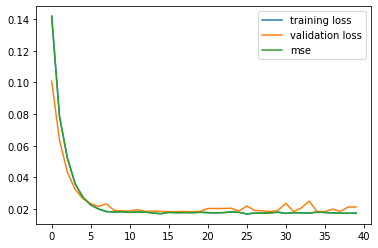

{'loss': [0.1418483406305313, 0.07874235510826111, 0.05245296657085419, 0.03599727153778076, 0.027394788339734077, 0.022602815181016922, 0.020002342760562897, 0.018345603719353676, 0.018142174929380417, 0.018261637538671494, 0.017865974456071854, 0.018056105822324753, 0.018054934218525887, 0.017420966178178787, 0.017018407583236694, 0.017851704731583595, 0.01765449158847332, 0.017720811069011688, 0.01764179766178131, 0.017905350774526596, 0.017696402966976166, 0.017528964206576347, 0.0176890529692173, 0.018122132867574692, 0.01787468232214451, 0.016872698441147804, 0.01736481860280037, 0.01735437661409378, 0.017542636021971703, 0.017970990389585495, 0.017204325646162033, 0.017672160640358925, 0.01751200668513775, 0.0173686183989048, 0.01804768480360508, 0.017782000824809074, 0.01752699539065361, 0.017298519611358643, 0.017263231799006462, 0.01736312173306942], 'mse': [0.1418483406305313, 0.07874235510826111, 0.05245296657085419, 0.03599727153778076, 0.027394788339734077, 0.022602815181

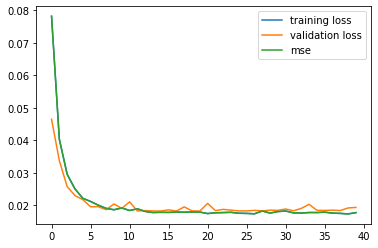

{'loss': [0.0782269760966301, 0.04029017686843872, 0.029509490355849266, 0.025001047179102898, 0.022113947197794914, 0.02113146148622036, 0.01996649242937565, 0.018998878076672554, 0.0185741875320673, 0.019133489578962326, 0.018346134573221207, 0.01886773481965065, 0.018046827986836433, 0.017722025513648987, 0.01778559200465679, 0.01774924248456955, 0.01787894032895565, 0.017815252766013145, 0.017883801832795143, 0.01786103844642639, 0.01739736646413803, 0.01764453761279583, 0.0177051592618227, 0.017780398949980736, 0.01749216392636299, 0.017446495592594147, 0.01732499711215496, 0.018196355551481247, 0.01755143329501152, 0.01801106333732605, 0.018191315233707428, 0.017606940120458603, 0.01756369136273861, 0.017718637362122536, 0.017710473388433456, 0.017832426354289055, 0.017541419714689255, 0.01744793727993965, 0.017290467396378517, 0.01768931746482849], 'mse': [0.0782269760966301, 0.04029017686843872, 0.029509490355849266, 0.025001047179102898, 0.022113949060440063, 0.021131461486220

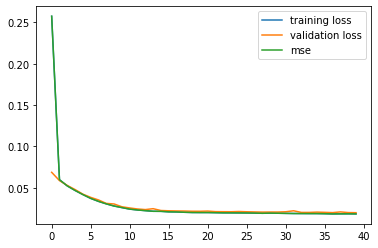

{'loss': [0.2574015259742737, 0.05979582667350769, 0.05232091248035431, 0.04683670029044151, 0.041862744837999344, 0.03725246340036392, 0.033652808517217636, 0.030626125633716583, 0.02800443023443222, 0.026146501302719116, 0.024278558790683746, 0.023238977417349815, 0.022432507947087288, 0.02165471576154232, 0.021600384265184402, 0.0209946408867836, 0.020857978612184525, 0.020466329529881477, 0.02019069716334343, 0.020139055326581, 0.020147431641817093, 0.01997343823313713, 0.019785212352871895, 0.01975712552666664, 0.019698118790984154, 0.01963018625974655, 0.019484907388687134, 0.019230255857110023, 0.01942886970937252, 0.019288931041955948, 0.01912033185362816, 0.01897432468831539, 0.018926702439785004, 0.018889443948864937, 0.018886566162109375, 0.01873444952070713, 0.01847190223634243, 0.01857418566942215, 0.018609918653964996, 0.0184794869273901], 'mse': [0.2574015259742737, 0.05979582667350769, 0.05232091620564461, 0.04683670029044151, 0.041862744837999344, 0.03725246340036392, 

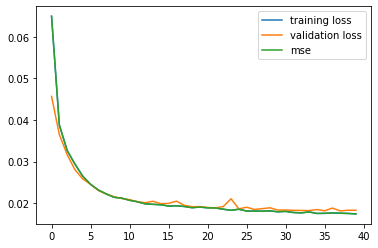

{'loss': [0.0649120882153511, 0.03878529369831085, 0.032671041786670685, 0.029393086209893227, 0.02648736909031868, 0.024540899321436882, 0.023158404976129532, 0.02223733440041542, 0.02142929472029209, 0.021210039034485817, 0.02070499211549759, 0.020346548408269882, 0.019849564880132675, 0.01973397471010685, 0.019623901695013046, 0.01932426169514656, 0.019381171092391014, 0.019218143075704575, 0.018924720585346222, 0.019077172502875328, 0.01889350265264511, 0.01886039413511753, 0.018561622127890587, 0.018300335854291916, 0.01855488307774067, 0.01811712607741356, 0.01811845973134041, 0.01808769255876541, 0.018160559237003326, 0.01793699711561203, 0.01804155670106411, 0.01776770129799843, 0.017684102058410645, 0.017901502549648285, 0.017542967572808266, 0.01757132261991501, 0.01765190251171589, 0.01759764552116394, 0.017540432512760162, 0.017428308725357056], 'mse': [0.0649120882153511, 0.03878529369831085, 0.032671041786670685, 0.029393086209893227, 0.02648736909031868, 0.02454089932143

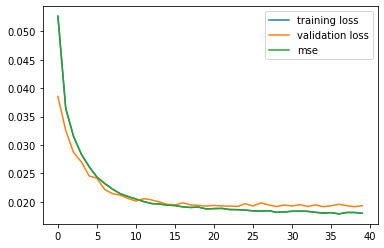

{'loss': [0.05265595018863678, 0.03644648939371109, 0.03151005879044533, 0.028369957581162453, 0.026160817593336105, 0.02433285117149353, 0.02319863997399807, 0.022212868556380272, 0.021395282819867134, 0.020909450948238373, 0.02047085389494896, 0.020025154575705528, 0.01967339962720871, 0.01958681456744671, 0.019403235986828804, 0.019322426989674568, 0.019095944240689278, 0.018987445160746574, 0.019047794863581657, 0.018727725371718407, 0.018790246918797493, 0.018819259479641914, 0.018625052645802498, 0.01859756000339985, 0.01851959526538849, 0.01838904432952404, 0.018327932804822922, 0.01842152513563633, 0.018129520118236542, 0.01820083148777485, 0.01831473968923092, 0.01833590492606163, 0.01830003410577774, 0.018135175108909607, 0.017993465065956116, 0.018076209351420403, 0.01785035990178585, 0.01810336299240589, 0.018102848902344704, 0.017968859523534775], 'mse': [0.05265595018863678, 0.03644649311900139, 0.03151005879044533, 0.028369957581162453, 0.026160817593336105, 0.0243328511

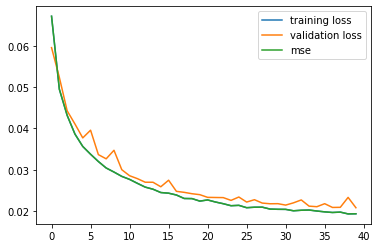

{'loss': [0.06711963564157486, 0.04945690184831619, 0.04314463213086128, 0.03861820325255394, 0.03562738001346588, 0.03374295309185982, 0.031982939690351486, 0.030415499582886696, 0.029433928430080414, 0.028386322781443596, 0.027658658102154732, 0.02670554630458355, 0.025792108848690987, 0.025282854214310646, 0.02447766438126564, 0.024321189150214195, 0.02388089895248413, 0.023037923499941826, 0.02301100641489029, 0.022404219955205917, 0.02268536388874054, 0.022187435999512672, 0.021776797249913216, 0.021291742101311684, 0.021380290389060974, 0.020810049027204514, 0.02092563547194004, 0.02094106748700142, 0.020477820187807083, 0.02042299695312977, 0.02040622942149639, 0.02006489597260952, 0.020193150267004967, 0.020244648680090904, 0.02000795677304268, 0.019804833456873894, 0.019653799012303352, 0.019742896780371666, 0.019306663423776627, 0.01934017986059189], 'mse': [0.06711963564157486, 0.04945690184831619, 0.04314463213086128, 0.03861820325255394, 0.03562738001346588, 0.033742960542

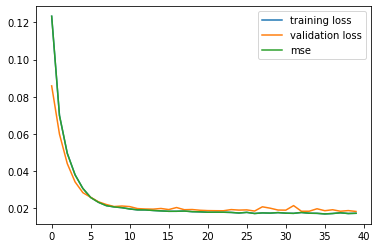

{'loss': [0.12329516559839249, 0.06996674835681915, 0.04962017759680748, 0.03807281330227852, 0.03074631094932556, 0.025892486795783043, 0.023297561332583427, 0.021511415019631386, 0.020834220573306084, 0.020422525703907013, 0.019731534644961357, 0.019247660413384438, 0.01921880431473255, 0.018918801099061966, 0.01868818886578083, 0.018469512462615967, 0.018481120467185974, 0.01860515959560871, 0.01827453076839447, 0.018176157027482986, 0.017963873222470284, 0.017991598695516586, 0.017973966896533966, 0.01785770058631897, 0.01755952276289463, 0.017890943214297295, 0.01729387789964676, 0.017608564347028732, 0.017495863139629364, 0.017769241705536842, 0.017477072775363922, 0.017370225861668587, 0.017835358157753944, 0.01743759587407112, 0.017378490418195724, 0.017065053805708885, 0.017284035682678223, 0.017661014571785927, 0.017281856387853622, 0.01740405708551407], 'mse': [0.12329516559839249, 0.06996674835681915, 0.04962017759680748, 0.03807281330227852, 0.03074631094932556, 0.02589248

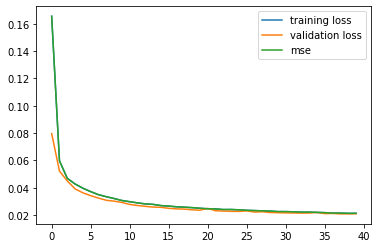

{'loss': [0.16550324857234955, 0.0597367100417614, 0.046892598271369934, 0.04275789111852646, 0.03967834264039993, 0.037153493613004684, 0.03493744134902954, 0.0334370993077755, 0.03214557096362114, 0.03067048452794552, 0.02980588935315609, 0.028940655291080475, 0.028172923251986504, 0.027843762189149857, 0.026961257681250572, 0.026589294895529747, 0.026073891669511795, 0.025787031278014183, 0.025458524003624916, 0.025002168491482735, 0.0246345866471529, 0.024528678506612778, 0.02407127432525158, 0.024105820804834366, 0.023862937465310097, 0.023503469303250313, 0.023311490193009377, 0.02311362326145172, 0.02293037623167038, 0.022558987140655518, 0.022563714534044266, 0.02240905538201332, 0.022153137251734734, 0.022178957238793373, 0.021970581263303757, 0.021799951791763306, 0.021457063034176826, 0.021464770659804344, 0.02128250151872635, 0.02132606692612171], 'mse': [0.16550324857234955, 0.0597367100417614, 0.046892598271369934, 0.04275789111852646, 0.03967834264039993, 0.0371534936130

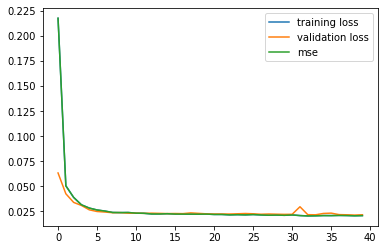

{'loss': [0.21737012267112732, 0.050335414707660675, 0.03875749930739403, 0.03138276934623718, 0.028141038492321968, 0.02623285911977291, 0.02515649050474167, 0.023747000843286514, 0.02363087795674801, 0.02371894009411335, 0.023048019036650658, 0.02293386124074459, 0.022269444540143013, 0.022258885204792023, 0.022517580538988113, 0.02217092737555504, 0.022120032459497452, 0.0220748633146286, 0.022041650488972664, 0.022131744772195816, 0.02176729030907154, 0.021760528907179832, 0.021369168534874916, 0.021563712507486343, 0.021359730511903763, 0.021674232557415962, 0.02128519117832184, 0.02099635638296604, 0.021149015054106712, 0.020918676629662514, 0.021274346858263016, 0.020659374073147774, 0.02031448855996132, 0.020423997193574905, 0.02066711336374283, 0.020626137033104897, 0.02079579420387745, 0.020691270008683205, 0.020453525707125664, 0.020626729354262352], 'mse': [0.21737012267112732, 0.050335414707660675, 0.038757503032684326, 0.03138276934623718, 0.028141038492321968, 0.02623285

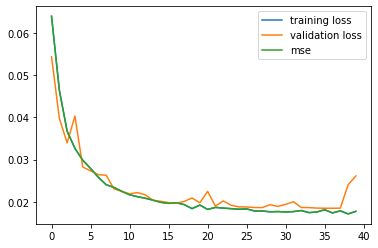

{'loss': [0.06402582675218582, 0.046466145664453506, 0.036726418882608414, 0.0326465480029583, 0.02985757775604725, 0.027898035943508148, 0.02579023316502571, 0.024034887552261353, 0.023386601358652115, 0.02246619015932083, 0.02164282463490963, 0.0211990624666214, 0.02083035372197628, 0.020368721336126328, 0.01985258050262928, 0.019613640382885933, 0.019744165241718292, 0.01931294985115528, 0.01835598237812519, 0.019199805334210396, 0.018171658739447594, 0.018649879842996597, 0.018483998253941536, 0.018349025398492813, 0.01821102760732174, 0.018296808004379272, 0.01779872365295887, 0.017796965315937996, 0.01760447397828102, 0.017660707235336304, 0.017562635242938995, 0.017656797543168068, 0.017904460430145264, 0.017405860126018524, 0.017563603818416595, 0.018092690035700798, 0.017339179292321205, 0.0178314708173275, 0.017102185636758804, 0.01771296001970768], 'mse': [0.06402582675218582, 0.046466145664453506, 0.036726418882608414, 0.0326465480029583, 0.02985757775604725, 0.027898035943

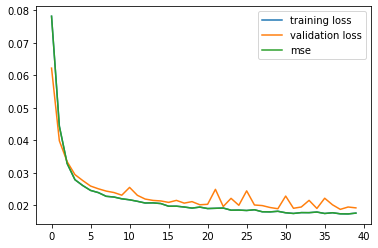

{'loss': [0.07823054492473602, 0.04440756514668465, 0.032898202538490295, 0.02792578749358654, 0.026128802448511124, 0.02463245950639248, 0.023956604301929474, 0.02282051555812359, 0.022597020491957664, 0.02205279842019081, 0.021744415163993835, 0.021279482170939445, 0.02075914479792118, 0.02079729549586773, 0.02058907225728035, 0.019769208505749702, 0.019782869145274162, 0.019523659721016884, 0.01919076219201088, 0.019500385969877243, 0.019053829833865166, 0.01912950538098812, 0.019212016835808754, 0.018550576642155647, 0.018582841381430626, 0.01845701038837433, 0.01867985539138317, 0.018061280250549316, 0.018026648089289665, 0.01821194589138031, 0.017753202468156815, 0.017542604357004166, 0.017804529517889023, 0.01778903231024742, 0.017977062612771988, 0.01753467321395874, 0.01776401698589325, 0.01743084006011486, 0.01740119978785515, 0.017647696658968925], 'mse': [0.07823054492473602, 0.04440756514668465, 0.032898202538490295, 0.02792578749358654, 0.026128802448511124, 0.02463245950

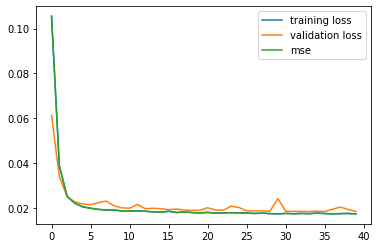

{'loss': [0.1055079847574234, 0.03873124718666077, 0.02508264221251011, 0.022016452625393867, 0.02044851891696453, 0.01981470175087452, 0.019298629835247993, 0.019048914313316345, 0.019031893461942673, 0.01863783225417137, 0.01857569068670273, 0.01862907037138939, 0.018475333228707314, 0.01821240223944187, 0.018049318343400955, 0.018476620316505432, 0.017900966107845306, 0.018173975870013237, 0.017908845096826553, 0.017713360488414764, 0.01796044036746025, 0.017667757347226143, 0.017720630392432213, 0.017833102494478226, 0.017727311700582504, 0.017713960260152817, 0.017470980063080788, 0.017638511955738068, 0.01741056516766548, 0.01728767529129982, 0.017513353377580643, 0.01735147275030613, 0.01749785803258419, 0.017398566007614136, 0.017643235623836517, 0.017453966662287712, 0.017325719818472862, 0.01741837151348591, 0.017485713586211205, 0.017309896647930145], 'mse': [0.1055079847574234, 0.03873124718666077, 0.02508264221251011, 0.022016452625393867, 0.02044851891696453, 0.0198147036

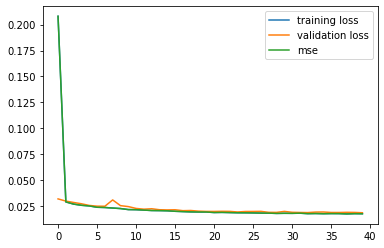

{'loss': [0.2081211358308792, 0.02875935472548008, 0.02663537487387657, 0.02550637722015381, 0.024893106892704964, 0.02359691821038723, 0.023363037034869194, 0.02283562906086445, 0.022339707240462303, 0.02135501801967621, 0.02124876156449318, 0.020860152319073677, 0.020443208515644073, 0.020359724760055542, 0.02018899656832218, 0.01970425248146057, 0.01940893940627575, 0.01913212426006794, 0.019020555540919304, 0.019006457179784775, 0.018514519557356834, 0.0186377614736557, 0.018461478874087334, 0.01827436499297619, 0.01824149116873741, 0.018133630976080894, 0.017952032387256622, 0.017916858196258545, 0.017645109444856644, 0.01776084303855896, 0.017711114138364792, 0.017870748415589333, 0.017425695434212685, 0.017541736364364624, 0.017361026257276535, 0.017490064725279808, 0.017457706853747368, 0.017160214483737946, 0.017413338646292686, 0.017317455261945724], 'mse': [0.2081211358308792, 0.02875935472548008, 0.02663537487387657, 0.02550637722015381, 0.024893106892704964, 0.023596918210

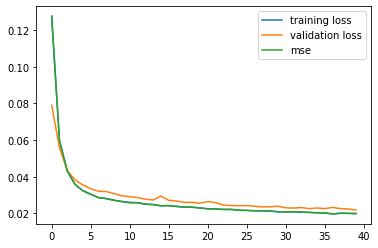

{'loss': [0.1275596022605896, 0.05964513495564461, 0.043125446885824203, 0.03573283180594444, 0.032361362129449844, 0.030430186539888382, 0.028598545119166374, 0.02804921753704548, 0.0271559227257967, 0.026443524286150932, 0.02589937299489975, 0.025820957496762276, 0.025040339678525925, 0.0247948095202446, 0.024141989648342133, 0.024218065664172173, 0.02378191240131855, 0.02344190888106823, 0.023365072906017303, 0.022965285927057266, 0.02248295024037361, 0.02246628701686859, 0.02215494029223919, 0.022145157679915428, 0.02169894427061081, 0.021623937413096428, 0.02140546403825283, 0.021421710029244423, 0.021270819008350372, 0.02087918482720852, 0.02077736146748066, 0.020880205556750298, 0.02063659206032753, 0.020525144413113594, 0.020308684557676315, 0.020245376974344254, 0.019701674580574036, 0.020055484026670456, 0.019994422793388367, 0.01989161968231201], 'mse': [0.1275596022605896, 0.05964513495564461, 0.043125446885824203, 0.03573283180594444, 0.032361362129449844, 0.03043018653988

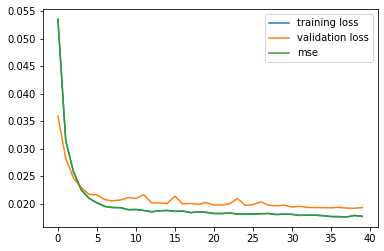

{'loss': [0.05353807657957077, 0.03148123249411583, 0.025813186541199684, 0.022517908364534378, 0.020992636680603027, 0.020187145099043846, 0.019537460058927536, 0.019328981637954712, 0.019308827817440033, 0.01894313655793667, 0.01897112838923931, 0.018795806914567947, 0.018563348799943924, 0.018733950331807137, 0.018799690529704094, 0.018629208207130432, 0.018690258264541626, 0.018405526876449585, 0.01853850856423378, 0.018459221348166466, 0.018245499581098557, 0.018240271136164665, 0.018329856917262077, 0.018149100244045258, 0.018128685653209686, 0.01816294901072979, 0.01819857396185398, 0.0182478167116642, 0.018054166808724403, 0.018143070861697197, 0.01808418333530426, 0.01790861040353775, 0.01794692873954773, 0.017934035509824753, 0.017847687005996704, 0.017690172418951988, 0.01767643913626671, 0.0176257137209177, 0.017888706177473068, 0.01773211359977722], 'mse': [0.05353807657957077, 0.03148123249411583, 0.025813190266489983, 0.022517908364534378, 0.020992636680603027, 0.0201871

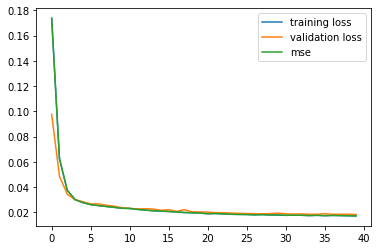

{'loss': [0.17368973791599274, 0.062401268631219864, 0.037458572536706924, 0.030064936727285385, 0.027682416141033173, 0.026101600378751755, 0.025327829644083977, 0.024619467556476593, 0.023950941860675812, 0.02322712540626526, 0.02304730750620365, 0.022328516468405724, 0.02177564799785614, 0.021244240924715996, 0.020982427522540092, 0.020642071962356567, 0.020317768678069115, 0.019833767786622047, 0.019686173647642136, 0.01939823478460312, 0.018914183601737022, 0.01905781961977482, 0.018754897639155388, 0.018439695239067078, 0.01833447441458702, 0.01826993189752102, 0.018027974292635918, 0.018198616802692413, 0.01789284497499466, 0.01786242239177227, 0.01761496067047119, 0.01772405579686165, 0.017657294869422913, 0.017430422827601433, 0.017621412873268127, 0.0173452440649271, 0.017533674836158752, 0.01741933263838291, 0.017270440235733986, 0.01714414544403553], 'mse': [0.17368973791599274, 0.062401268631219864, 0.037458572536706924, 0.030064936727285385, 0.027682416141033173, 0.026101

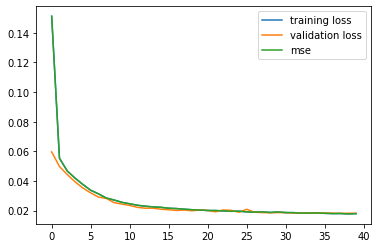

{'loss': [0.15111225843429565, 0.0553319938480854, 0.04676186293363571, 0.04192185774445534, 0.03766045346856117, 0.033759020268917084, 0.03130730241537094, 0.02851519174873829, 0.02717662788927555, 0.02562161348760128, 0.024619556963443756, 0.02363571710884571, 0.02299683354794979, 0.022527635097503662, 0.022233759984374046, 0.021626412868499756, 0.021400634199380875, 0.020973404869437218, 0.020626531913876534, 0.020391171798110008, 0.020102491602301598, 0.020077550783753395, 0.019823187962174416, 0.0195520780980587, 0.019638361409306526, 0.019179675728082657, 0.018995177000761032, 0.019156698137521744, 0.018766816705465317, 0.01909816451370716, 0.018685096874833107, 0.01865730620920658, 0.01830499991774559, 0.018374036997556686, 0.01846134290099144, 0.01819843053817749, 0.018015656620264053, 0.018078025430440903, 0.017796505242586136, 0.01800086908042431], 'mse': [0.15111225843429565, 0.0553319938480854, 0.04676186293363571, 0.04192185774445534, 0.03766045346856117, 0.033759020268917

<Figure size 432x288 with 0 Axes>

In [67]:
#print(prediction)

show = False

result = []
for n, pred in enumerate(predictions): 
  result = []
  for i in range(len(test_input)):
    result.append((pred[i] - test_result[i]))
    #print(pred[i] - test_result[i])

  print(layers_tested[n],"lamda =", lamdas_tested[n], "avg =", (sum(result)/len(result)),"std = ",np.std(result))
  print("Val_loss",min(history[n].history['val_loss']),"mse",min(history[n].history['mse']) )
  if show: 
    plt.plot(result, label = 'Difference')
    plt.plot(pred, label = 'Prediction')
    plt.plot(test_result, label = 'Value')
    plt.legend(loc='best')
    plt.show()
    plt.clf()

for n, run in enumerate(history): 
  print(layers_tested[n],"lamda =", lamdas_tested[n])
  plt.plot(run.history['loss'], label='training loss')
  plt.plot(run.history['val_loss'], label='validation loss')
  plt.plot(run.history['mse'], label='mse')
  plt.legend(loc='best')
  plt.show()
  plt.clf()
  print(run.history)

